In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('WppoolGrowthSampleData.csv')
df.head()

,user_id,install_date,last_active_date,subscription_type,country,total_sessions,page_views,download_clicks,activation_status,days_active,pro_upgrade_date,plan_type,monthly_revenue,churned
0,1,6/29/2023,7/12/2023,Free,UK,3,15,1,1,13,NaN,NaN,0,1
1,2,4/10/2023,7/25/2023,Free,India,133,665,0,1,106,NaN,NaN,0,0
2,3,10/25/2023,12/7/2023,Free,USA,53,106,0,1,43,NaN,NaN,0,0
3,4,8/26/2023,11/9/2023,Pro,Canada,242,242,0,1,75,11/9/2023,Basic,49,0
4,5,5/14/2023,11/22/2023,Free,UK,12,48,0,1,192,NaN,NaN,0,0


# 2. User Engagement Analysis
-------------

<font color='blue'> **a. Identify the average number of sessions for Free vs. Pro users (Optional: SQL query).** <font>

In [4]:
# Group by subscription_type and calculate the average total_sessions
avg_sessions = df.groupby("subscription_type")["total_sessions"].mean()

# Displaying the result
print(f"The average number of sessions for Free vs. Pro users.\n{round(avg_sessions,2)}")

The average number of sessions for Free vs. Pro users.
subscription_type
Free     76.08
Pro     154.68
Name: total_sessions, dtype: float64


<font color='blue'> **b. Find the top 5 most active users based on total sessions (Optional: SQL query).** <font>

In [5]:
# Get the top 5 most active users based on total_sessions
top_active_users = df.nlargest(5, "total_sessions")

# Displaying the result
print(f"The List of top 5 most active users.\n{top_active_users[["user_id", "total_sessions"]]}")

The List of top 5 most active users.
      user_id  total_sessions
188       189             300
821       822             300
1571     1572             300
2456     2457             300
3348     3349             300


<font color='blue'> **c. Identify the top 5 countries with the highest engagement.** <font>

In [7]:
# Group by country and sum total_sessions to measure engagement
country_engagement = df.groupby("country")["total_sessions"].sum()

# Get the top 5 countries with the highest engagement
top_countries = country_engagement.nlargest(5)

# Displaying the result
print(f"The List of top 5 countries with the highest engagement.\n{top_countries}")

The List of top 5 countries with the highest engagement.
country
India      272202
Germany    266319
Canada     264217
USA        261635
France     259495
Name: total_sessions, dtype: int64


# 3. Churn Analysis
--------------------

<font color='blue'> **a. Calculate the overall churn rate for Free vs. Pro users (Optional: SQL query).** <font>

In [8]:
# Group by subscription_type and calculate churn rate
churn_rate = df.groupby("subscription_type")["churned"].mean() * 100  # Convert to percentage

# Displaying the result
print(f"The overall churn rate for Free vs. Pro users.\n{round(churn_rate,2)}")

The overall churn rate for Free vs. Pro users.
subscription_type
Free    28.60
Pro     28.25
Name: churned, dtype: float64


<font color='blue'> **b. Identify the top 3 factors contributing to churn using correlation or regression analysis.** <font>

In [11]:
# Selecting only numerical columns for correlation analysis
numerical_features = ["total_sessions", "page_views", "download_clicks", "activation_status", "days_active", "monthly_revenue"]
correlation = df[numerical_features + ["churned"]].corr()["churned"].abs().sort_values(ascending=False)

# Top 3 factors contributing to churn
top_3_factors = correlation[1:4]  # Exclude 'churned' itself

# Display the result
print(top_3_factors)

days_active          0.617213
monthly_revenue      0.008328
activation_status    0.005823
Name: churned, dtype: float64


In [12]:
# Compare churn trends between Free and Pro users
# Convert install_date to datetime format
df["install_date"] = pd.to_datetime(df["install_date"])

# Group by subscription type and install date to calculate churn rate over time
churn_trends = df.groupby(["install_date", "subscription_type"])["churned"].mean().unstack()
print(churn_trends)

subscription_type      Free       Pro
install_date                         
2023-01-01         0.062500  0.000000
2023-01-02         0.097561  0.111111
2023-01-03         0.066667  0.125000
2023-01-04         0.048780  0.363636
2023-01-05         0.055556  0.000000
...                     ...       ...
2023-12-28         1.000000  1.000000
2023-12-29         1.000000  1.000000
2023-12-30         1.000000  1.000000
2023-12-31         1.000000  1.000000
2024-01-01         1.000000  1.000000

[366 rows x 2 columns]


<Figure size 1500x700 with 0 Axes>

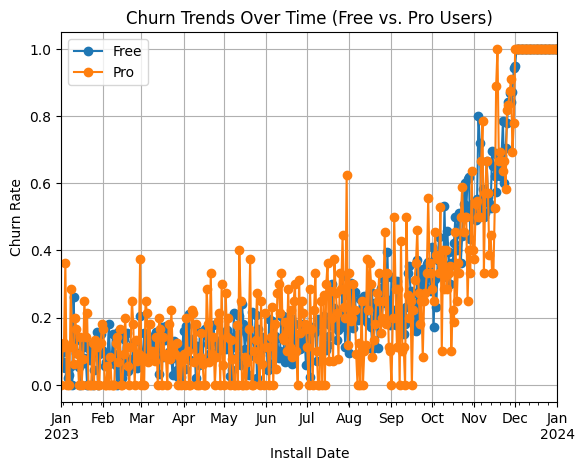

In [17]:
# Plot churn trends
plt.figure(figsize=(15, 7))
churn_trends.plot(marker="o")
plt.title("Churn Trends Over Time (Free vs. Pro Users)")
plt.xlabel("Install Date")
plt.ylabel("Churn Rate")
plt.legend(["Free", "Pro"])
plt.grid()
plt.show()

# 4. Revenue & Upgrade Trends

In [1]:
# What percentage of users upgraded from Free to Pro?
# Count total Free users
total_free_users = df[df["subscription_type"] == "Free"]["user_id"].nunique()

# Count users who upgraded (have a pro_upgrade_date)
upgraded_users = df[df["pro_upgrade_date"].notna()]["user_id"].nunique()

# Calculate the upgrade percentage
upgrade_percentage = (upgraded_users / total_free_users) * 100

# Display the result
print(f"Percentage of users who upgraded from Free to Pro: {upgrade_percentage:.2f}%")


NameError: name 'df' is not defined

In [ ]:
# b: Calculate the total monthly revenue from Pro users
# Filter only Pro users
pro_users = df[df["subscription_type"] == "Pro"]

# Calculate total monthly revenue
total_monthly_revenue = pro_users["monthly_revenue"].sum()

# Display the result
print(f"Total Monthly Revenue from Pro Users: ${total_monthly_revenue:,.2f}")


Total Monthly Revenue from Pro Users: $235,481.00


In [ ]:
# Which Pro plan (Basic, Standard, or Enterprise) contributes the most revenue?
# Filter Pro users
pro_users = df[df["subscription_type"] == "Pro"]

# Group by plan_type and sum monthly_revenue
revenue_by_plan = pro_users.groupby("plan_type")["monthly_revenue"].sum().sort_values(ascending=False)

# Display the result
print(revenue_by_plan)


plan_type
Basic         80339
Enterprise    78764
Standard      76378
Name: monthly_revenue, dtype: int64


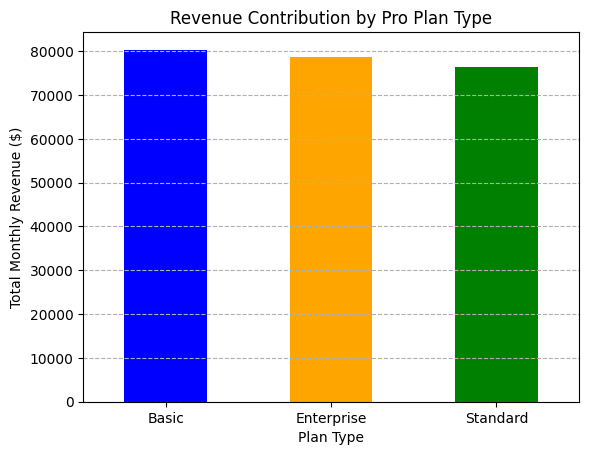

In [ ]:
import matplotlib.pyplot as plt

# Plot revenue distribution
revenue_by_plan.plot(kind="bar", color=["blue", "orange", "green"])
plt.title("Revenue Contribution by Pro Plan Type")
plt.xlabel("Plan Type")
plt.ylabel("Total Monthly Revenue ($)")
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--")
plt.show()


## 5. Actionable Growth Recommendations

In [ ]:
# a. Suggest three strategies to reduce churn.
Based on the churn analysis, including correlation and engagement trends, here are three strategies to reduce churn:
1. Improve User Engagement & Activation
2. Optimize Free-to-Pro Conversion Funnel
3. Proactive Retention for At-Risk Users.

In [ ]:
# Propose two ways to increase Free-to-Pro conversions.
Based on the Free-to-Pro conversion analysis, here are two strategies to increase conversions:
1. Enhance Engagement & Feature Teasing.
2. Optimize Pricing & Personalized Offers

In [ ]:
# c. Identify potential market expansion opportunities based on country trends.
Market Expansion Opportunities Based on Country Trends
By analyzing conversion rates, engagement levels, and revenue trends by country, we can identify high-potential markets for expansion.

1. Target High-Engagement, Low-Conversion Countries
2. Expand in High-Revenue, High-Conversion Countries
3. Identify Emerging Markets with Growth Potential

# Conversion Rate Optimization (CRO)

In [ ]:
# a: If WPPOOL increases the landing page conversion rate by 10%, what would be the estimated impact on Pro upgrades?


A 10% increase in landing page conversion rate will lead to approximately a 10% increase in Pro upgrades, assuming all other factors remain constant.

Example Calculation (Hypothetical Numbers)
Current Free Users: 10,000
Free-to-Pro Upgrade Rate: 5% (0.05)
Current Pro Upgrades: 500 (10,000 × 0.05)
New Pro Upgrades After 10% Increase:
500
×
1.10
=
550
500×1.10=550
→ Estimated +50 additional Pro upgrades.